In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from numba import njit
import multiprocessing, pathos.multiprocessing
from tqdm.notebook import tqdm
import random

The market starts as bull, it will now evolve for 50 days of post-capitalistic hellscape



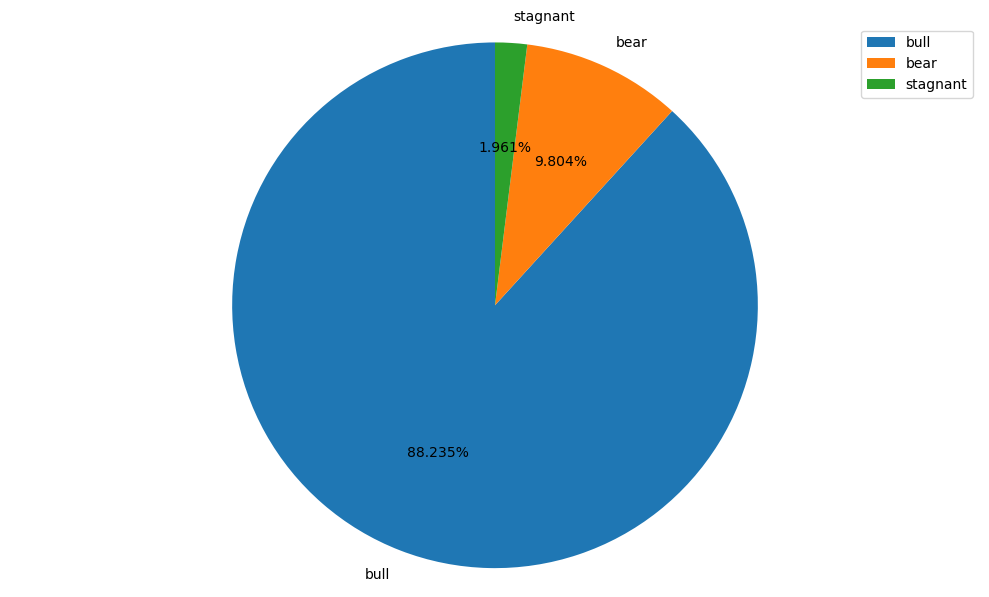

In [2]:
Market = (['bull', 'bear', 'stagnant'])



def initial_state(Market):
    c = np.random.randint(0,3)
    return Market[c]



def bull_evo():                      # Shared logic for each evolution case
    a = np.random.uniform(0,100)
    if 0 <= a and a < 90:
        return 0
    elif 90 <= a and a < 97.5:
        return 1
    elif 97.5 <= a and a <= 100:
        return 2

def bear_evo():
    a = np.random.uniform(0,100)
    if 0 <= a and a < 15:
        return 0
    elif 15 <= a and a < 95:
        return 1
    elif 95 <= a and a <= 100:
        return 2

def stagnant_evo():
    a = np.random.uniform(0,100)
    if 0 <= a and a < 25:
        return 0
    elif 25 <= a and a < 50:
        return 1
    elif 50 <= a and a <= 100:
        return 2

def day_counter(State, Counts):
    if State == 'bull':
        Counts[0] += 1
        return 
    elif State == 'bear':
        Counts[1] += 1
        return
    elif State == 'stagnant':
        Counts[2] += 1
        return
    else:
        return print(f"Invalid market state...did we make it?")
       


def evolve(Ndays):
    Market = (['bull', 'bear', 'stagnant'])
    Counters = np.zeros(len(Market),dtype=int)
    State = initial_state(Market)
    print(f"The market starts as {State}, it will now evolve for {Ndays} days of post-capitalistic hellscape\n")
    day_counter(State, Counters)
    a = 3
    for n in range(Ndays):
        if State == 'bull':
            a = bull_evo()
        elif State == 'bear':
            a = bear_evo()
        elif State == 'stagnant': 
            a = stagnant_evo()
        State = Market[a]
        day_counter(State, Counters)
     
    plt.figure(figsize=(10, 6))
    
    plt.pie(Counters, labels=Market, autopct='%1.3f%%', startangle=90)
    plt.axis('equal')
 
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


def evolve_speed_eval(Ndays):
    Market = (['bull', 'bear', 'stagnant'])
    Counters = np.zeros(len(Market),dtype=int)
    State = initial_state(Market)
    print(f"The market starts as {State}, it will now evolve for {Ndays} days of post-capitalistic hellscape\n")
    day_counter(State, Counters)
    a = 3
    for n in range(Ndays):
        if State == 'bull':
            a = bull_evo()
        elif State == 'bear':
            a = bear_evo()
        elif State == 'stagnant': 
            a = stagnant_evo()
        State = Market[a]
        day_counter(State, Counters)
    print(f"Bull days = {Counters[0]}, Bear days = {Counters[1]}, Stagnant days = {Counters[2]}\n")
    return 

evolve(50)

The market starts as bull, it will now evolve for 10 days of post-capitalistic hellscape

The market starts as bull, it will now evolve for 100 days of post-capitalistic hellscape

The market starts as stagnant, it will now evolve for 1000 days of post-capitalistic hellscape

The market starts as bull, it will now evolve for 10000 days of post-capitalistic hellscape

The market starts as stagnant, it will now evolve for 100000 days of post-capitalistic hellscape

The market starts as bull, it will now evolve for 1000000 days of post-capitalistic hellscape

The market starts as bull, it will now evolve for 10000000 days of post-capitalistic hellscape



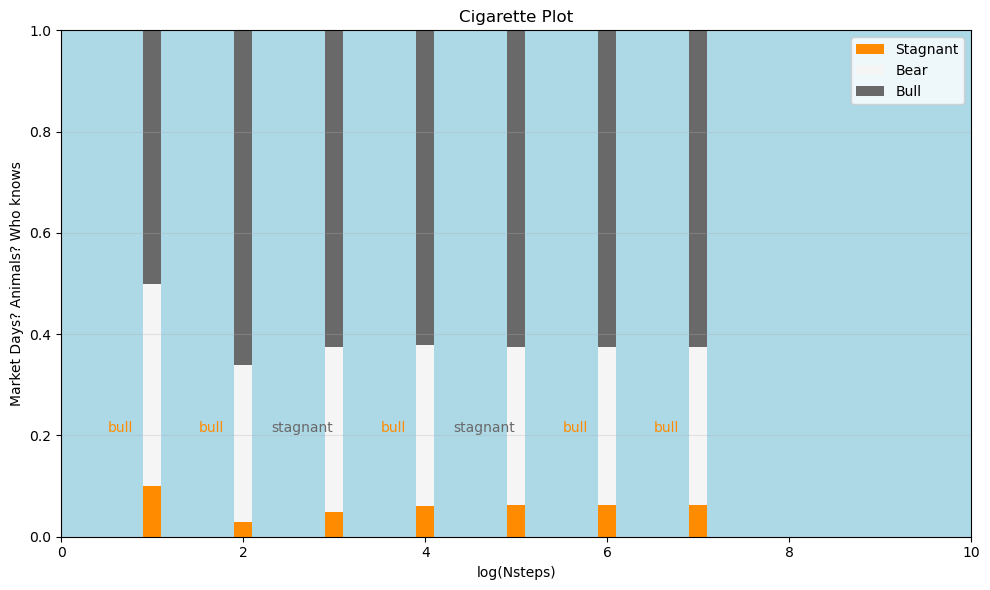

In [3]:
# Convergence Evaluation

def evolve_converge_test(Ndays):
    #Market = (['bull', 'bear', 'stagnant'])
    
    Market = np.array(['bull', 'bear', 'stagnant'])
    Counters = np.zeros(len(Market),dtype=int)
    State = initial_state(Market)
    Initializer = np.where(Market == State)[0][0]
    print(f"The market starts as {State}, it will now evolve for {Ndays} days of post-capitalistic hellscape\n")
    day_counter(State, Counters)
    a = 3
    for n in range(Ndays):
        if State == 'bull':
            a = bull_evo()
        elif State == 'bear':
            a = bear_evo()
        elif State == 'stagnant': 
            a = stagnant_evo()
        State = Market[a]
        day_counter(State, Counters)
    return Counters, Initializer

Stats = []
Initial_states = []

     
#steps = np.array([10, 100, 1000, 10000, 100000, 1000000,10000000,100000000,1000000000])

#steps = np.array([10, 100, 1000, 10000, 100000, 1000000,10000000, 100000000])
steps = np.array([10, 100, 1000, 10000, 100000, 1000000,10000000])

for n in range(len(steps)):
    counts, primo = evolve_converge_test(steps[n])
    counts = counts / steps[n]
    Stats.append(counts)
    Initial_states.append(primo)


Stats = np.array(Stats)
Initial_states = np.array(Initial_states)
labels = ['Bull', 'Bear', 'Stagnant']
colors = ['dimgrey', 'whitesmoke', 'darkorange']

# bottom starts at zero for each bar
bottom = np.zeros(len(steps))

plt.figure(figsize=(10, 6))


for i in range(3):
    plt.bar(
        np.log10(steps),
        Stats[:,2-i],
        bottom=bottom,
        color=colors[2-i],
        label=labels[2-i],
        width=0.2 # optional: makes spacing reasonable
    )
    bottom += Stats[:,2-i]

for i in range(len(steps)):
        
    plt.text(np.log10(steps[i]) - 0.35, 0.2, f"{Market[Initial_states[i]]}",
                            rotation=0, va='bottom', ha='center', fontsize=10,
                            color=colors[2-Initial_states[i]])
        

plt.xlabel('log(Nsteps)')
plt.ylabel('Market Days? Animals? Who knows')
plt.ylim(0, 1)
plt.title(f"Cigarette Plot")
#plt.xlim(0, np.max(steps))
plt.xlim(0, 10)
plt.legend()
plt.grid(axis='y', alpha=0.3)
ax = plt.gca()
ax.set_facecolor('lightblue') 
plt.tight_layout()
plt.show()


In [ ]:
# Speed Evaluation
%timeit evolve_speed_eval(50000)

In [11]:
import numpy as np
from numba import njit

@njit
def evolve_state(state):                     # NO STRINGS FOR NUMBA! Not accepted
    a = np.random.uniform(0.0, 100.0)

    if state == 0:  
        if a < 90:
            return 0
        elif a < 97.5:
            return 1
        else:
            return 2

    elif state == 1:  
        if a < 15:
            return 0
        elif a < 95:
            return 1
        else:
            return 2

    else:  
        if a < 25:
            return 0
        elif a < 50:
            return 1
        else:
            return 2

@njit

def evolve(Ndays):
    Counters = np.zeros(3,dtype=np.int64)
    State = np.random.randint(0,3)
    if State == 0:
        print(f"The market is in a bull state\n")
    elif State == 1:
        print(f"The market is in a bear state\n")
    elif State == 2:
        print(f"The market is in a stagnant state\n")
        
    print(f"It will now evolve for {Ndays} days of post-capitalistic hellscape\n")
    Counters[State] += 1
    a = 3
    for n in range(Ndays):
        a = evolve_state(State)
        State = a
        Counters[State] += 1
    print(f"Bull days = {Counters[0]}, Bear days = {Counters[1]}, Stagnant days = {Counters[2]}\n")
     
%timeit evolve(50000)

print(f"Factor 100 in execution speed!")



The market is in a stagnant state

It will now evolve for 50000 days of post-capitalistic hellscape

Bull days = 31482, Bear days = 15325, Stagnant days = 3194

The market is in a bear state

It will now evolve for 50000 days of post-capitalistic hellscape

Bull days = 31075, Bear days = 15906, Stagnant days = 3020

The market is in a bear state

It will now evolve for 50000 days of post-capitalistic hellscape

Bull days = 31007, Bear days = 15850, Stagnant days = 3144

The market is in a bear state

It will now evolve for 50000 days of post-capitalistic hellscape

Bull days = 31154, Bear days = 15622, Stagnant days = 3225

The market is in a stagnant state

It will now evolve for 50000 days of post-capitalistic hellscape

Bull days = 31115, Bear days = 15726, Stagnant days = 3160

The market is in a stagnant state

It will now evolve for 50000 days of post-capitalistic hellscape

Bull days = 31471, Bear days = 15450, Stagnant days = 3080

The market is in a bull state

It will now evo